<a href="https://colab.research.google.com/github/JasmineGarland/Blackout_Project/blob/Code/Deep_LearningCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection

In [ ]:
# These commands allow you to read directly from Morteza's CU GoogleDrive containing the Data
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()  # Authenticate and create the PyDrive client. 
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
def pd_read_csv_drive(id, drive, dtype=None):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('Filename.csv')  
  return(pd.read_csv('Filename.csv',dtype=dtype))

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

%cd gdrive/MyDrive/Garland_GAANNFellowshipResearch/Blackouts_classproject


Mounted at /content/gdrive/
/content/gdrive/MyDrive/Garland_GAANNFellowshipResearch/Blackouts_classproject


## 1- Loading Data

In [ ]:
#Reading the map file off Morteza's drive
#Reading the map file off Morteza's drive

df_blackout = pd.read_parquet('CA_20172020_blackout.parquet')
df =  df_blackout[round(df_blackout['Duration_hour']) >= 1].reset_index()
#df.CountyFIPS = df.CountyFIPS.astype(int)
#df_gb = df.groupby('Location')
#df = df_gb.get_group('San Bernardino').reset_index()
'''
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df[['EVENT_TYPE']])
one_c = pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)

df_encoded = pd.merge(df, one_c, left_index=True, right_index=True)

df_encoded = pd.merge(df, one_c, left_index=True, right_index=True)
'''

"\noe_style = OneHotEncoder()\noe_results = oe_style.fit_transform(df[['EVENT_TYPE']])\none_c = pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)\n\ndf_encoded = pd.merge(df, one_c, left_index=True, right_index=True)\n\ndf_encoded = pd.merge(df, one_c, left_index=True, right_index=True)\n"

### 1.1- Checking for Missing Values

In [ ]:
covid_df = df

### 1.2- EDA

In [ ]:
#Dropping some  columns for time T. They won't be used in prediction. 


covid_df.drop(columns=['index', 'UtilityName', 'StateName', 'Location', 'CityName', 'Blackout_Start', 'Blackout_End', 'Duration_min',
                            'Total', 'White alone', 'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races',
       'Two or more races: Two races including Some other race',
       'Two or more races: Two races excluding Some other race, and three or more races',
       'Total_FPL', 'Under .50', '.50 to .99', '1.00 to 1.24', '1.25 to 1.49',
       '1.50 to 1.84', '1.85 to 1.99', '2.00 and over', 'EVENT_TYPE', 'Blackout_Duration', 'GEOID'
                            ],inplace=True)

In [ ]:
# descriptive stats of features
covid_df.iloc[:,6:].describe().T

,count,mean,std,min,25%,50%,75%,max
Day,1126006.0,15.712769,8.683823,1.000,8.00,16.00,23.00,31.0
Hour,1126006.0,13.866334,7.241117,0.000,7.00,16.00,19.00,23.0
Precipitable Water,1126006.0,1.562644,0.758127,0.086,1.00,1.40,2.00,6.0
Wind Direction,1126006.0,216.383988,93.640347,0.000,158.00,242.00,288.00,360.0
Temperature,1126006.0,16.603726,7.914361,-17.000,11.10,15.20,21.40,46.5
Relative Humidity,1126006.0,60.907102,25.747490,2.150,39.73,63.87,83.85,100.0
Dew Point,1126006.0,6.981577,5.796223,-28.600,4.00,8.20,11.00,22.7
GHI,1126006.0,126.842274,228.626998,0.000,0.00,0.00,158.00,1088.0
Wind Speed,1126006.0,2.044841,1.316815,0.000,1.00,1.70,2.80,13.0


Let us look at the histograms of features and the target variable.

In [ ]:
fig = plt.figure(figsize=(15, 12))

# loop over columns 17 to end
for i in range(covid_df.iloc[:,17:].shape[1]): #for all rows, but column 18 forward for our inspection.
    plt.subplot(6, 6, i+1)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    # f.axes.set_ylim([0, train.shape[0]])
    plt.hist(covid_df.iloc[:,17+i], color='#3F5D7D')
    plt.title(covid_df.columns[17+i])
plt.tight_layout()

<Figure size 1080x864 with 0 Axes>

Let's take a closer look at the distribution of the target variable.

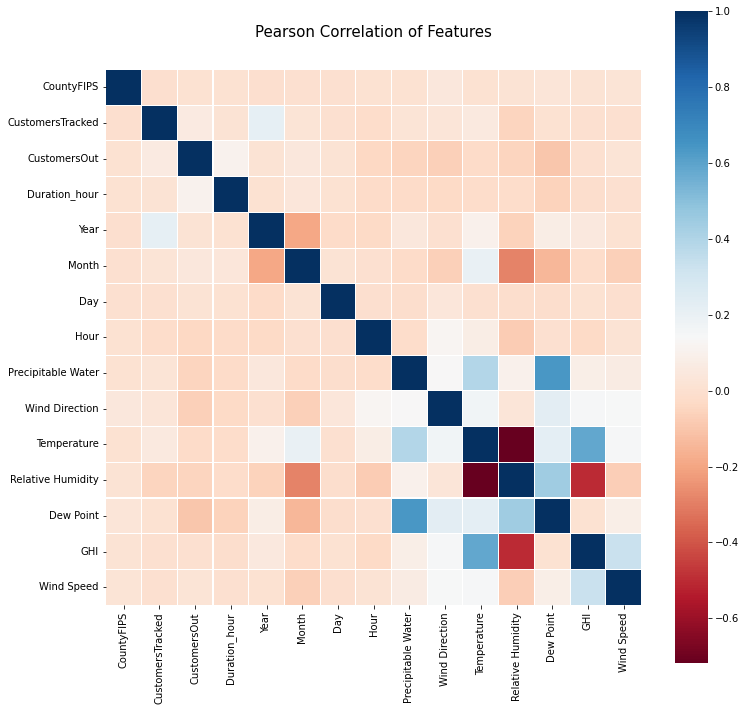

In [ ]:
#Drop some of the name features so that we can look at the correlation of numerical ones below.
features_for_plot = covid_df
# Plotting the pearson correlation matrix of the features + traget
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(features_for_plot.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()



Seperating the features and the target:

### 1.3- Creating features and target variable

In [ ]:


features = covid_df

X = features.values

#print(X)
y = df['Duration_hour']

#Let's shuffle the data to minimize the effect of the orginal order of training/testing data on our results:
np.random.seed(42)
indices = np.arange(len(X))
print(indices)
np.random.shuffle(indices)
X = X[indices]
y = y[indices]
X.shape

[      0       1       2 ... 1126003 1126004 1126005]


(1126006, 15)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Scaling the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
X_train = X_train_std
X_test = X_test_std

## 2- Feed Forward Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Flatten, Dense
from keras import Sequential
from tensorflow.nn import relu

tf.random.set_seed(21)

'''
TODO: Create a sequential model with your chosen architecture. Between 1 and 3 hidden layers. 
A dropout layer for each and one output layer with 1 neuron.
Set the number of neurons more or less inverse proportional to the number of layers. 
So more layers, means fewer neurons in ech.
'''
#I use 3 hidden layers, thus 3 hidden layers and one output layer equal 4 layers: neurons = 1/4 = 0.25
#assuming 0.25 * 4 = 1 neuron per layer - also assuming we do not count the input layer given no weights/bias in that layer 
#TODO notes above.
model = Sequential([
    Dense(1, activation = relu), # 1st hidden layer. Dense layer is a layer in which all nodes are connected to all of the nodes of the previous layer
    Dropout(.1), # Dropout randomly turns off a proportion of nodes that are specified. It is used for regularizing the network
    Dense(1, activation = relu), 
    Dropout(.1),
    Dense(1, activation = relu), 
    Dropout(.1),
     Dense(1, activation = relu),  
     Dropout(.1),
     Dense(1, activation = relu), 
    Dropout(.1),
    Dense(1) #This is the output. 
])

#TODO
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='mse', #This is what the model will use.
              metrics=['mae', 'mse']) #This is what we want printed out for our info. Both Mean Squared Error and Mean Absolute Error.



In [ ]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

#TODO create an early_stop function with a patience of 4. 
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=4) 

# TODO: fit the model on training data with a validation split of 0.1
ff_model = model.fit(X_train, y_train, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])


......

In [ ]:
# create a datafram to store loss, MSE, and MAE for each epoch 
hist = pd.DataFrame(ff_model.history)
hist['epoch'] = ff_model.epoch

# TODO: calculate RMSE and print it
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))

print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

Final Root Mean Square Error on validation set: 47.069


In [ ]:
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,2904.939453,9.897552,2904.939453,2216.466553,11.072337,2216.466553,0
1,2874.822510,11.379923,2874.822510,2215.491455,11.576988,2215.491455,1
2,2874.697998,11.522678,2874.697998,2215.502441,11.556357,2215.502441,2
3,2874.697510,11.525569,2874.697510,2215.501221,11.558199,2215.501221,3
4,2874.696777,11.532722,2874.696777,2215.528809,11.515509,2215.528809,4
5,2874.705078,11.499186,2874.705078,2215.492676,11.569556,2215.492676,5


#####Question 1
Which column shows how many times the entire training dataset was iterated through before training stoped? [answer1 in Canvas, multiple choice]? 

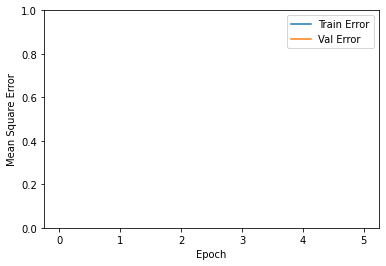

In [ ]:
# plot validation and training error against number of epochs
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,1])
# 
plot_history()

####Question 2
Will increasing patience to a higher number necessarily lead to better  results on the test set (anser in canvas, multiple choice)? 

In [ ]:
# evaluate the model on the test set, and print RMSE on test set. 
mse, _, _ = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

7038/7038 [==============================] - 12s 2ms/step - loss: 1804.5481 - mae: 11.5108 - mse: 1804.5481
Root Mean Square Error on test set: 42.48


####Question 3
Enter your RMSE on the TEST set in Canvas.

####Question 4
 
Use `model.summary()` to get the number of trainable parameters in your model. Answer in Canvas.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 16        
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

Between yourselves, compare the number of trainable parameters and RMSE of your model design to your group mates. Who has the fewest trainable parameters and lower RMSE at the same time? What is the relation between these two? Obviously the lower the number of trainable parameters, the faster the training and precition process is. (You don't need to answer this on Canvas).

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 4.2 MB/s 
     |████████████████████████████████| 1.6 MB 42.2 MB/s 


### 3.1-Create a HyperModel

In [ ]:
import kerastuner as kt
from kerastuner import HyperModel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


To keep the computation time managable, **only try relu (no need to try tanh or sigmoid)**, relu works best here. Sigmoid is almost never better than tanh, in any scenario. This holds in a lot of situations)
. 
Instead, work with your groupmates to focus on different number of layers/nodes in each. 

In [ ]:
# build a class that inherits from HyperModel
class RegressionHyperModel(HyperModel):

    def __init__(self, input_shape):
        self.input_shape = input_shape    
    
    def build(self, hp): # define the structure of the network and the searchable space for each param
        model = Sequential()
        #TODO: Design a hyper parameter space with lose inspiration from the results you generated with your group above.
        model.add(
            Dense( # add a dense layer
                units=hp.Int('units', 1, 18, 2, default=1), 
                activation=hp.Choice(
                      'dense_activation',
                    values=['relu'], # different activation functions to test
                    default='relu'),
                input_shape=input_shape
            )
        )
        model.add( # add dropout with values from 0.0 to 0.3 with increments of 0.1
            Dropout(
                rate = hp.Float(
                    'dropout',
                    min_value=0.0, #try out different dropout percentages from 0 to 30 percent 
                    max_value=0.3,
                    default=0.005,
                    step=0.1)
            )
        )
        model.add(
            Dense( # add a second dense layer
                units=hp.Int('units', 1, 28, 2, default=1),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu'],
                    default='relu')
            )
        )  
        model.add(
            Dropout( # add a second dropout with values from 0.0 to 0.3 with increments of 0.05
                rate = hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.3,
                    default=0.005,
                    step=0.05)
            )
        ) 
        model.add(
            Dense( # add a third dense layer. This is probably an overkill for such a small dataset. But let's try.
                units=hp.Int('units', 1, 16, 2, default=1),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu'],
                    default='relu')
            )
        )  
        model.add(
            Dropout( # add a third dropout layer
                rate = hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.5,
                    default=0.005,
                    step=0.05)
            )
        )  

        model.add(
            Dense( # add a third dense layer. This is probably an overkill for such a small dataset. But let's try.
                units=hp.Int('units', 1, 16, 2, default=1),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu'],
                    default='relu')
            )
        )  
        model.add( # add dropout with values from 0.0 to 0.3 with increments of 0.1
            Dropout(
                rate = hp.Float(
                    'dropout',
                    min_value=0.0, #try out different dropout percentages from 0 to 30 percent 
                    max_value=0.3,
                    default=0.005,
                    step=0.1)
            )
        )
        model.add(
            Dense( # add a third dense layer. This is probably an overkill for such a small dataset. But let's try.
                units=hp.Int('units', 1, 16, 2, default=1),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu'],
                    default='relu')
            )
        )  
        model.add( # add dropout with values from 0.0 to 0.3 with increments of 0.1
            Dropout(
                rate = hp.Float(
                    'dropout',
                    min_value=0.0, #try out different dropout percentages from 0 to 30 percent 
                    max_value=0.3,
                    default=0.005,
                    step=0.1)
            )
        )
        model.add(
            Dense( # add a third dense layer. This is probably an overkill for such a small dataset. But let's try.
                units=hp.Int('units', 1, 16, 2, default=1),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu'],
                    default='relu')
            )
        )  
        model.add( # add dropout with values from 0.0 to 0.3 with increments of 0.1
            Dropout(
                rate = hp.Float(
                    'dropout',
                    min_value=0.0, #try out different dropout percentages from 0 to 30 percent 
                    max_value=0.3,
                    default=0.005,
                    step=0.1)
            )
        )
        model.add(
            Dense( # add a third dense layer. This is probably an overkill for such a small dataset. But let's try.
                units=hp.Int('units', 1, 16, 2, default=1),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu'],
                    default='relu')
            )
        )  
        model.add( # add dropout with values from 0.0 to 0.3 with increments of 0.1
            Dropout(
                rate = hp.Float(
                    'dropout',
                    min_value=0.0, #try out different dropout percentages from 0 to 30 percent 
                    max_value=0.3,
                    default=0.005,
                    step=0.1)
            )
        )
        model.add(
            Dense( # add a third dense layer. This is probably an overkill for such a small dataset. But let's try.
                units=hp.Int('units', 1, 16, 2, default=1),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu'],
                    default='relu')
            )
        )  
        model.add( # add dropout with values from 0.0 to 0.3 with increments of 0.1
            Dropout(
                rate = hp.Float(
                    'dropout',
                    min_value=0.0, #try out different dropout percentages from 0 to 30 percent 
                    max_value=0.3,
                    default=0.005,
                    step=0.1)
            )
        )
        model.add(
            Dense( # add a third dense layer. This is probably an overkill for such a small dataset. But let's try.
                units=hp.Int('units', 1, 16, 2, default=1),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu'],
                    default='relu')
            )
        )  
        model.add( # add dropout with values from 0.0 to 0.3 with increments of 0.1
            Dropout(
                rate = hp.Float(
                    'dropout',
                    min_value=0.0, #try out different dropout percentages from 0 to 30 percent 
                    max_value=0.3,
                    default=0.005,
                    step=0.1)
            )
        )
        model.add(
            Dense( # add a third dense layer. This is probably an overkill for such a small dataset. But let's try.
                units=hp.Int('units', 1, 16, 2, default=1),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu'],
                    default='relu')
            )
        )  
        model.add( # add dropout with values from 0.0 to 0.3 with increments of 0.1
            Dropout(
                rate = hp.Float(
                    'dropout',
                    min_value=0.0, #try out different dropout percentages from 0 to 30 percent 
                    max_value=0.3,
                    default=0.005,
                    step=0.1)
            )
        )
        model.add(
            Dense(1)
            )
        #For activation, ONLY try RELU. No need to search for tanh.  

            
        
        #Compile
        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Choice('learning_rate', 
                          values=[1e-2, 1e-3])), #Took  1e-4 out to run faster in class.
                      loss='mse',
                      metrics=['mse'])
        return model

In [ ]:
# the number of features
input_shape = (X_train.shape[1],) 
# create an instance of the class RegressionHyperModel 
hypermodel = RegressionHyperModel(input_shape) 

In [ ]:
# this is defined to clear training output after each run of hyperparam tuning
import IPython
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

###3.2-Running the HyperBand search

In [ ]:

from kerastuner import Hyperband
# Hyperband optimization 
tuner_hb = Hyperband( hypermodel,
            objective='val_mse', # Name of model metric to optimize 
            #max_epochs=20, # the maximum number of epochs to train one model. (the same as model.fit, we use early stopping with a patience, so a high max_epochs is fine). Ideally hihger.
            factor=4, #the factor by which hyperband throws away the less useful hyperparams
            hyperband_iterations=1, #Ideally this should be higher, but we have limited time
            seed=21,
            overwrite=True)

In [29]:
#Perform the search to tune tuner_hb using training data. This will take ~10-20 mins to run.
tuner_hb.search(X_train, y_train, epochs=20, validation_split=0.1, verbose=0, 
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=4), ClearTrainingOutput()])

### 3.3-Inspecting and refitting the best model

In [30]:
best_model_hb = tuner_hb.get_best_models(num_models=1)[0]
best_model_hb.evaluate(X_test, y_test)

7038/7038 [==============================] - 13s 2ms/step - loss: 0.0268 - mse: 0.0268


[0.026770733296871185, 0.026770733296871185]

In [ ]:
tuned_model = tuner_hb.get_best_models(1)[0]
tuned_model_params = tuned_model.get_config()

In [32]:
for i in range(1, len(tuned_model_params['layers'])-1):
  print('layer number: {}'.format(i))
  if i%2 == 0:
    print('layer name: {}'.format(tuned_model_params['layers'][i]['config']['name']), ', dropout rate: {}'.format(tuned_model_params['layers'][i]['config']['rate']))
  else:
    print('layer name: {}'.format(tuned_model_params['layers'][i]['config']['name']), ', activation: {}'.format(tuned_model_params['layers'][i]['config']['activation']), ', number of nodes: {}'.format(tuned_model_params['layers'][i]['config']['units']))
  print('---------------------------------------')

layer number: 1
layer name: dense , activation: relu , number of nodes: 5
---------------------------------------
layer number: 2
layer name: dropout , dropout rate: 0.0
---------------------------------------
layer number: 3
layer name: dense_1 , activation: relu , number of nodes: 5
---------------------------------------
layer number: 4
layer name: dropout_1 , dropout rate: 0.0
---------------------------------------
layer number: 5
layer name: dense_2 , activation: relu , number of nodes: 5
---------------------------------------
layer number: 6
layer name: dropout_2 , dropout rate: 0.0
---------------------------------------
layer number: 7
layer name: dense_3 , activation: relu , number of nodes: 5
---------------------------------------
layer number: 8
layer name: dropout_3 , dropout rate: 0.0
---------------------------------------
layer number: 9
layer name: dense_4 , activation: relu , number of nodes: 5
---------------------------------------
layer number: 10
layer name: dro

In [33]:
best_model_hb = tuner_hb.get_best_models(num_models=1)[0]
best_model_hb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 80        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_3 (Dense)             (None, 5)                 3

In [38]:
price_tuned_model_hb = best_model_hb.fit(X_train, y_train, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])


.........

In [39]:
hist_tuned_hb = pd.DataFrame(price_tuned_model_hb.history)
hist_tuned_hb['epoch'] = price_tuned_model_hb.epoch

# show RMSE measure 
rmse_final = np.sqrt(float(hist_tuned_hb['val_mse'].tail(1)))

print('Root Mean Square Error on validation set after tuning: {}'.format(round(rmse_final, 3)))

Root Mean Square Error on validation set after tuning: 0.879


In [40]:
hist_tuned_hb

,loss,mse,val_loss,val_mse,epoch
0,45.224407,45.224407,0.103889,0.103889,0
1,3.201874,3.201874,0.001739,0.001739,1
2,4.171281,4.171281,0.087851,0.087851,2
3,5.509428,5.509428,0.007754,0.007754,3
4,1.228962,1.228962,0.000053,0.000053,4
5,5.160777,5.160777,7.483768,7.483768,5
6,3.500607,3.500607,0.021846,0.021846,6
7,9.654924,9.654924,1.157670,1.157670,7
8,1.880678,1.880678,0.772142,0.772142,8


In [41]:
loss_tuned, mse_tuned = best_model_hb.evaluate(X_test, y_test)
best_hps = tuner_hb.get_best_hyperparameters(num_trials = 1)[0]

print('Root Mean Square Error on test set after tuning: {}'.format(round(np.sqrt(mse_tuned), 3)))
print("and the optimal learning rate for the optimizer is {}".format(best_hps.get('learning_rate')))


7038/7038 [==============================] - 14s 2ms/step - loss: 0.5719 - mse: 0.5719
Root Mean Square Error on test set after tuning: 0.756
and the optimal learning rate for the optimizer is 0.001
